<a href="https://colab.research.google.com/github/Nuel2627/DS_ML_Project_colab-integration/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Task
Tell me about this dataset.

Here is all the data you need:
"New.csv"

## Data loading

### Subtask:
Load the dataset "New.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "New.csv" into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('New.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'New.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'New.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,DODQTR,DODYEAR,WGT_NEW,SA_WGT_NEW,RECTYPE,...,NON_INTV,ACPT_FAM,REJ_FAM,ACPT_PER,REJ_PER,ACPTCHLD,REGION,os_censor,os,HYRTEV
0,Eligible,Assumed alive,"Ineligible, under age 18, assumed alive, or no...","Assumed alive, under age 18, ineligible for mo...","Assumed alive, under age 18, ineligible for mo...","Ineligible, under age 18, or assumed alive","Ineligible, under age 18, or assumed alive",4464.0,9582.0,30 Sample Adult,...,NaN,1,0,2,0,0,3 South,0.0,189,NaN
1,Eligible,Assumed deceased,Malignant neoplasms (C00-C97),No - Condition not listed as a multiple cause ...,Yes - Condition listed as a multiple cause of ...,January-March,2009,4127.0,4320.0,10 Household,...,NaN,1,0,1,0,0,2 Midwest,1.0,60,NaN
2,Eligible,Assumed alive,"Ineligible, under age 18, assumed alive, or no...","Assumed alive, under age 18, ineligible for mo...","Assumed alive, under age 18, ineligible for mo...","Ineligible, under age 18, or assumed alive","Ineligible, under age 18, or assumed alive",1780.0,2331.0,10 Household,...,NaN,1,0,2,0,1,3 South,0.0,189,NaN
3,Eligible,Assumed deceased,All other causes (residual),No - Condition not listed as a multiple cause ...,No - Condition not listed as a multiple cause ...,October-December,2015,2035.0,2045.0,10 Household,...,NaN,1,0,1,0,0,4 West,1.0,141,NaN
4,Eligible,Assumed deceased,Malignant neoplasms (C00-C97),No - Condition not listed as a multiple cause ...,No - Condition not listed as a multiple cause ...,October-December,2015,4117.0,8617.0,10 Household,...,NaN,1,0,2,0,0,2 Midwest,1.0,141,NaN


## Data exploration

### Subtask:
Explore the loaded dataset to understand its key characteristics.


**Reasoning**:
I need to explore the dataset's characteristics, including shape, data types, descriptive statistics, unique values, missing values, and correlation.



In [2]:
# Data Shape and Info
print("Data Shape:", df.shape)
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Column Exploration
print("\nColumn Exploration:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        print(f"\nColumn '{col}' Unique Values:")
        if len(unique_vals) <= 10 :
            print(unique_vals)
        else:
            print(f"Number of unique values: {len(unique_vals)}")
            display(df[col].value_counts().head(10))

# Missing Value Analysis
print("\nMissing Value Analysis:")
missing_percentages = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentages})
display(missing_df.sort_values(by='Missing Percentage', ascending=False))

# Correlation Analysis
print("\nCorrelation Analysis:")
numerical_cols = df.select_dtypes(include=['number'])
if not numerical_cols.empty:
    correlation_matrix = numerical_cols.corr()
    display(correlation_matrix)
else:
    print("No numerical columns found for correlation analysis.")

Data Shape: (28598, 490)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Columns: 490 entries, ELIGSTAT to HYRTEV
dtypes: float64(140), int64(52), object(298)
memory usage: 106.9+ MB

Descriptive Statistics:


,WGT_NEW,SA_WGT_NEW,SRVY_YR,FMX,FPX,STRATUM,PSU,DOB_Y_P,AGE_P,MOM_ED,...,FWICCT,NON_INTV,ACPT_FAM,REJ_FAM,ACPT_PER,REJ_PER,ACPTCHLD,os_censor,os,HYRTEV
count,27081.000000,27081.000000,28598.0,28598.000000,28598.000000,28598.000000,28598.000000,27375.000000,28598.000000,0.0,...,17378.000000,0.0,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,27081.000000,28598.000000,0.0
mean,3624.321997,7410.365090,2004.0,1.033639,1.385412,165.845444,1.502098,1957.242776,46.194279,NaN,...,0.122511,NaN,1.067068,0.007308,2.556158,0.007728,0.694944,0.177911,170.371425,NaN
std,1447.762891,4512.848146,0.0,0.245791,0.679556,95.897450,0.500004,17.205677,17.145397,NaN,...,0.458069,NaN,0.370021,0.100611,1.494606,0.109884,1.112805,0.382445,37.522834,NaN
min,752.000000,776.000000,2004.0,1.000000,1.000000,1.000000,1.000000,1920.000000,18.000000,NaN,...,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2692.000000,4157.000000,2004.0,1.000000,1.000000,85.000000,1.000000,1945.000000,32.000000,NaN,...,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,180.000000,NaN
50%,3530.000000,6607.000000,2004.0,1.000000,1.000000,161.000000,2.000000,1959.000000,45.000000,NaN,...,0.000000,NaN,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,183.000000,NaN
75%,4332.000000,9516.000000,2004.0,1.000000,2.000000,249.000000,2.000000,1971.000000,58.000000,NaN,...,0.000000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,186.000000,NaN
max,27744.000000,92134.000000,2004.0,7.000000,11.000000,339.000000,2.000000,1986.000000,84.000000,NaN,...,6.000000,NaN,7.000000,4.000000,15.000000,4.000000,13.000000,1.000000,189.000000,NaN



Column Exploration:

Column 'ELIGSTAT' Unique Values:
['Eligible' 'Ineligible']

Column 'MORTSTAT' Unique Values:
['Assumed alive' 'Assumed deceased' 'Ineligible or under age 18']

Column 'UCOD_LEADING' Unique Values:
Number of unique values: 11


,count
UCOD_LEADING,
"Ineligible, under age 18, assumed alive, or no cause of death data available",23780
All other causes (residual),1224
"Diseases of heart (I00-I09, I11, I13, I20-I51)",1204
Malignant neoplasms (C00-C97),1166
Chronic lower respiratory diseases (J40-J47),293
Cerebrovascular diseases (I60-I69),250
"Accidents (unintentional injuries) (V01-X59, Y85-Y86)",184
Diabetes mellitus (E10-E14),171
Alzheimer's disease (G30),159



Column 'DIABETES' Unique Values:
['Assumed alive, under age 18, ineligible for mortality follow-up, or MCOD not available'
 'No - Condition not listed as a multiple cause of death'
 'Yes - Condition listed as a multiple cause of death']

Column 'HYPERTEN' Unique Values:
['Assumed alive, under age 18, ineligible for mortality follow-up, or MCOD not available'
 'Yes - Condition listed as a multiple cause of death'
 'No - Condition not listed as a multiple cause of death']

Column 'DODQTR' Unique Values:
['Ineligible, under age 18, or assumed alive' 'January-March'
 'October-December' 'April-June' 'July-September']

Column 'DODYEAR' Unique Values:
Number of unique values: 17


,count
DODYEAR,
"Ineligible, under age 18, or assumed alive",23780
2015,381
2019,380
2017,370
2016,368
2013,365
2018,362
2012,321
2014,317



Column 'RECTYPE' Unique Values:
['30 Sample Adult' '10 Household' '60 Family' '70 Injury/Poiso']

Column 'HHX' Unique Values:
['Range of Values']

Column 'WTIA' Unique Values:
['All Values']

Column 'WTFA' Unique Values:
['All Values']

Column 'SEX' Unique Values:
['2 Female' '1 Male']

Column 'ORIGIN_I' Unique Values:
['2 No' '1 Yes']

Column 'ORIGIMPT' Unique Values:
['4 Hispanic origin given by respondent/proxy'
 "1 Imputed: was 'refused' Hispanic Origin"
 "3 Imputed: was 'does not know' Hispanic Ori"]

Column 'HISPIMPT' Unique Values:
['4 Hispanic Origin type given by respondent/proxy'
 "3 Imputed: was 'does not know' Hispanic Origin"
 "1 Imputed: was 'refused' Hispanic Origin"]

Column 'HISPAN_I' Unique Values:
['12 Not Hispanic/Spanish origin' '03 Mexican-American' '08 Other Spanish'
 '02 Mexican' '01 Puerto Rico' '06 Central or South American'
 '04 Cuban/Cuban American' '00 Multiple Hispanic'
 '05 Dominican (Republic)' '07 Other Latin American, type']

Column 'RACERPI2' Unique 

,count
RRP,
01 Household reference person,19352
02 Spouse (husband/wife),5919
04 Child (biological/adoptive/in-law/step/foster),1265
03 Unmarried Partner,563
13 Housemate/roommate,502
07 Parent (biological/adoptive/in-law/step/foster,329
08 Brother/sister (biological/adoptive/in-law/ste,224
12 Other relative,121
14 Roomer/Boarder,98



Column 'HHREFLG' Unique Values:
[nan 'P HH Reference person' '8 Not ascertained']

Column 'DOB_M' Unique Values:
Number of unique values: 15


,count
DOB_M,
10-Oct,2407
7-Jul,2384
8-Aug,2379
1-Jan,2347
9-Sep,2303
5-May,2286
12-Dec,2256
3-Mar,2224
6-Jun,2213



Column 'FRRP' Unique Values:
Number of unique values: 15


,count
FRRP,
01 Family reference person,20031
02 Spouse (husband/wife),5928
04 Child (biological/adoptive/in-law/step/foster),1265
03 Unmarried Partner,567
07 Parent (biological/adoptive/in-law/step/foster,329
08 Brother/sister (biological/adoptive/in-law/ste,233
12 Other relative,123
06 Grandchild,52
11 Niece/Nephew,33



Column 'FMRPFLG' Unique Values:
[nan 'B Family respondent' '8 Not ascertained']

Column 'FMREFLG' Unique Values:
[nan 'P Family reference person' '8 Not ascertained']

Column 'R_MARITL' Unique Values:
['1 Married - spouse in household' '4 Widowed' '5 Divorced'
 '7 Never married' '8 Living with partner'
 '2 Married - spouse not in house' '6 Separated']

Column 'CDCMSTAT' Unique Values:
['3 Married' '5 Widowed' '2 Divorced' '4 Single/never married'
 '1 Separated']

Column 'FMOTHER' Unique Values:
Number of unique values: 12


,count
FMOTHER,
00 Mother not a household member,26925
1,772
2,658
3,153
4,34
5,29
6,16
7,7
11,1



Column 'MOM_DEG' Unique Values:
[nan '1 Biological' '5 In-law' '8 Not ascertained' '4 Foster' '2 Adoptive'
 '3 Step']

Column 'FFATHER' Unique Values:
['00 Father not in household' '1' '4' '2' '5' '3' '6' '7' '8']

Column 'DAD_DEG' Unique Values:
[nan '1 Biological' '3 Step' '5 In-law' '2 Adoptive' '4 Foster'
 '8 Not ascert']

Column 'PARENTS' Unique Values:
['4 Neither mother nor father' '3 Mother and father' '2 Father, no mother'
 '1 Mother, no father']

Column 'ASTATFLG' Unique Values:
['1 Sample Adult - has record']

Column 'PLAADL' Unique Values:
['2 No' '1 Ye']

Column 'PLAIADL' Unique Values:
['2 No' '1 Ye']

Column 'PLAWKNOW' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'PLAWKLIM' Unique Values:
['2 Not limited in work' '1 Limited in work' '0 Unable to work'
 "9 Don't Know"]

Column 'PLAWALK' Unique Values:
['2 No' '1 Ye' '9 Do']

Column 'PLAREMEM' Unique Values:
['2 No' '1 Ye' '7 Re' '9 Do']

Column 'PLIMANY' Unique Values:
['2 Not limited in any way' '0 Limitation pr

,count
REGIONBR,
01 United States,23593
"02 Mexico, Central America, Caribbean Islands",3083
04 Europe,477
10 SE Asia,345
03 South America,309
09 Asia,206
08 Indian Subcontinent,147
11 Elsewhere,136
06 Africa,127



Column 'GEOBRTH' Unique Values:
['1 USA: born in one of the 50 United States or D.C.'
 '3 Not born in the U.S. or a U.S. territory'
 '2 USA: born in a U.S. territory' '7 Refused' "9 Don't know"
 '8 Not ascertained']

Column 'YRSINUS' Unique Values:
[nan '5 15 years or more' '3 5 yrs., less than 10 yrs.'
 '4 10 yrs., less than 15 yrs.' '2 1 yr., less than 5 yrs.' '9 Unknown'
 '1 Less than 1 year']

Column 'CITIZENP' Unique Values:
['1 Yes, citizen of the United States'
 '2 No, not a citizen of the United States' '8 Not ascertained'
 '7 Refused' "9 Don't know"]

Column 'EDUC1' Unique Values:
Number of unique values: 22


,count
EDUC1,
14 High School Graduate,7410
"15 Some college, no degree",5573
"18 Bachelor's degree (Example: BA, AB, BS, BBA)",4506
"19 Master's degree (Example: MA, MS, MEng, MEd, MBA)",1769
"16 Associate degree: occupational, technical, or vocat",1737
11th grade,1061
17 Associate degree: academic program,947
10th grade,793
09 9th grade,776



Column 'PMILTRY' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'DOINGLWP' Unique Values:
['1 Working for pay at a job or business'
 '5 Not working at a job or business and not looking for work'
 '2 With a job or business but not at work' '3 Looking for work'
 '4 Working, but not for pay, at a job or business' "9 Don't know"
 '7 Refused']

Column 'WHYNOWKP' Unique Values:
Number of unique values: 13


,count
WHYNOWKP,
03 Retired,4436
01 Taking c,2157
09 Disabled,1632
02 Going to,759
04 On a pla,370
06 Temporar,303
10 Other,269
08 On layof,140
07 Have job,121



Column 'WRKHRS2' Unique Values:
Number of unique values: 91


,count
WRKHRS2,
40,8216
50,1317
45,883
60,807
30,655
20,612
35,487
55,375
32,324



Column 'WRKFTALL' Unique Values:
[nan '1 Yes' '2 No' '9 Don' '7 Ref']

Column 'WRKLYR1' Unique Values:
['1 Yes' '2 No' '7 Refused' "9 Don't k"]

Column 'WRKMYR' Unique Values:
Number of unique values: 15


,count
WRKMYR,
12,15481
6,609
10,585
9,481
3,385
8,365
4,311
11,280
01 1 month,257



Column 'ERNYR_P' Unique Values:
Number of unique values: 14


,count
ERNYR_P,
"06 $25,000-$34,999",2492
97 Refused,2408
"07 $35,000-$44,999",1993
"05 $20,000-$24,999",1622
99 Don't know,1611
"03 $10,000-$14,999",1491
"04 $15,000-$19,999",1371
"08 $45,000-$54,999",1362
"01 $01-$4,999",1324



Column 'HIEMPOF' Unique Values:
['1 Yes' nan '2 No' '7 Ref' '9 Don']

Column 'PSAL' Unique Values:
['1 Yes' '2 No' "9 Don't k" '7 Refused']

Column 'PSEINC' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PSSRR' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PPENS' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'POPENS' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PSSI' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PTANF' Unique Values:
['2 No' '7 Refused' '1 Yes' "9 Don't k"]

Column 'POWBEN' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PINTRSTR' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PDIVD' Unique Values:
['2 No' '1 Yes' "9 Don't k" '7 Refused']

Column 'PCHLDSP' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PINCOT' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'PSSAPL' Unique Values:
['2 No' '1 Yes' '7 Refused'

,count
LOCALL1A,
01 1-9 employees,6685
08 1000 employees or more,3767
02 10-24 employees,3657
05 100-249 employees,2875
03 25-49 employees,2767
04 50-99 employees,2565
06 250-499 employees,1648
99 Don't know,1380
07 500-999 employees,1272



Column 'YRSWRKPA' Unique Values:
Number of unique values: 40


,count
YRSWRKPA,
00 Less than 1 year,4326
1,2190
2,2063
3,2047
5,1594
4,1476
10,1045
6,940
35 35 or more years,883



Column 'WRKLONGH' Unique Values:
['2 No' nan '1 Yes' '7 Ref' '9 Don']

Column 'HOURPDA' Unique Values:
['2 No' '7 Refused' '1 Yes' "9 Don't k" nan]

Column 'PDSICKA' Unique Values:
['1 Yes' '2 No' '7 Refused' nan "9 Don't k"]

Column 'ONEJOB' Unique Values:
['2 No' nan '1 Ye' '7 Re' '9 Do']

Column 'HYPEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'CHDEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'ANGEV' Unique Values:
['2 No' '1 Ye' '7 Re' '9 Do']

Column 'MIEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'HRTEV' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref']

Column 'STREV' Unique Values:
['2 No' '1 Ye' '7 Re' '9 Do']

Column 'EPHEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'AASMEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'ULCEV' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re']

Column 'CANEV' Unique Values:
['2 No' '1 Yes' '7 Ref' '9 Don']

Column 'DIBEV' Unique Values:
['2 No' '1 Ye' '3 Bo' '7 Re' '9 Do']

Column 'AHAYFYR' Uniqu

,count
WKDAYR,
000 None,11104
2,2173
1,1517
3,1299
5,1005
4,648
10,323
7,262
6,198



Column 'ALCNDRT' Unique Values:
[nan '1 At least one chronic cond causes functl lim'
 '9 Unk if any chronic cond causes functl lim'
 '2 No chronic cond causes functl lim']

Column 'ALCHRONR' Unique Values:
['0 Not limited in any way (incl unk if limited)'
 '1 Limited; caused by at least one chronic cond'
 '3 Limited; unk if cond is chronic'
 '2 Limited; not caused by chronic cond']

Column 'SMKEV' Unique Values:
['2 No' '1 Yes']

Column 'SMKNOW' Unique Values:
[nan '2 Some days' '3 Not at all' '1 Every day' '7 Refused' "9 Don't know"]

Column 'SMKSTAT2' Unique Values:
['4 Never smoker' '2 Current some day smoker' '3 Former smoker'
 '1 Current every day smoke' '5 Smoker, current status']

Column 'SMKQTTP' Unique Values:
[nan '4 Year(s)' '3 Month(s' '2 Week(s)' "9 Don't k" '1 Day(s)'
 '7 Refused']

Column 'VIGNO' Unique Values:
Number of unique values: 46


,count
VIGNO,
000 Never,17141
1,2953
3,2553
2,2103
4,1167
5,931
996 Unabl,759
7,409
6,250



Column 'VIGTP' Unique Values:
['2 Per week' '0 Never' '3 Per mont' '1 Per day' "9 Don't kn" '4 Per year'
 '6 Unable t' '8 Not asce' '7 Refused']

Column 'VIGFREQW' Unique Values:
Number of unique values: 23


,count
VIGFREQW,
95 Never,17141
3,2417
2,1768
7,1666
1,1547
4,1082
5,883
96 Unabl,759
00 Less,746



Column 'MODNO' Unique Values:
Number of unique values: 43


,count
MODNO,
000 Never,13230
1,4886
2,2910
3,2776
7,1170
5,1157
4,1139
996 Unabl,526
999 Don't,264



Column 'MODTP' Unique Values:
['0 Never' '1 Per day' '2 Per week' '3 Per mont' '8 Not asce' "9 Don't kn"
 '4 Per year' '6 Unable t' '7 Refused']

Column 'MODFREQW' Unique Values:
Number of unique values: 24


,count
MODFREQW,
95 Never,13230
7,4317
3,2577
2,2501
1,1744
5,1127
4,1015
96 Unabl,526
00 Less,501



Column 'MODLNGTP' Unique Values:
[nan '1 Minutes' '2 Hours' "9 Don't k" '8 Not asc']

Column 'STRNGNO' Unique Values:
Number of unique values: 34


,count
STRNGNO,
000 Never,21225
3,2034
1,1694
2,1453
4,674
996 Unabl,544
5,449
7,207
999 Don't,108



Column 'STRNGTP' Unique Values:
['0 Never' '2 Per week' '3 Per mont' '1 Per day' "9 Don't kn" '6 Unable t'
 '4 Per year' '8 Not asce' '7 Refused']

Column 'STRFREQW' Unique Values:
Number of unique values: 23


,count
STRFREQW,
95 Never,21225
3,1960
2,1283
7,976
1,841
4,637
96 Unabl,544
5,431
00 Less,364



Column 'ALC1YR' Unique Values:
['1 Yes' '2 No' '9 Don' '7 Ref']

Column 'ALCLIFE' Unique Values:
[nan '2 No' '1 Yes' '7 Ref' '9 Don']

Column 'ALC12MTP' Unique Values:
['1 Week' nan '3 Year' '2 Mont' '0 Neve' "9 Don'" '7 Refu']

Column 'ALC12MWK' Unique Values:
Number of unique values: 12


,count
ALC12MWK,
00 Less than one day per week,8388
95 Did not drink in past year,4261
1,3588
2,1996
7,1205
3,1035
4,372
5,363
99 Don't know,219



Column 'ALCSTAT' Unique Values:
['07 Current moderate' '06 Current light' '01 Lifetime abstainer'
 '05 Current infrequent' '02 Former infrequent' '08 Current heavier'
 '03 Former regular' '10 Drinking status un' '09 Current drinker, f'
 '04 Former, unknown fr']

Column 'ALC5UPNO' Unique Values:
Number of unique values: 79


,count
ALC5UPNO,
000 Never/None,11295
1,1270
2,1087
3,498
5,404
10,341
4,278
999 Don't know,258
6,234



Column 'ALC5UPTP' Unique Values:
['0 Never/None' '1 Per week' nan '3 Per year' "9 Don't know" '2 Per month'
 '7 Refused']

Column 'ALC5UPYR' Unique Values:
Number of unique values: 82


,count
ALC5UPYR,
000 Never/none,11295
1,731
2,682
52,470
12,412
5,367
3,359
10,335
999 Don't know,258



Column 'AUSUALPL' Unique Values:
['1 Yes' '2 There is NO place' '3 There is MORE THAN ONE place'
 '7 Refused' '8 Not ascertained' "9 Don't know"]

Column 'APLKIND' Unique Values:
["2 Doctor's office or HMO" nan '1 Clinic or health center' "9 Don't know"
 '4 Hospital outpatient dep' '3 Hospital emergency room'
 "6 Doesn't go to one place" '5 Some other place' '7 Refused']

Column 'AHCPLROU' Unique Values:
['1 Yes' nan '2 No' '9 Don' '8 Not']

Column 'AHCPLKND' Unique Values:
Number of unique values: 11


,count
AHCPLKND,
0 Doesn't get preventive care anywhere,3418
2 Doctor's office or HMO,1315
1 Clinic or health center,673
6 Doesn't go to one place most often,381
3 Hospital emergency room,121
5 Some other place,72
4 Hospital outpatient department,59
8 Not ascertained,15
9 Don't know,7



Column 'AHCCHGYR' Unique Values:
['1 Yes' '2 No' nan '9 Don' '8 Not' '7 Ref']

Column 'AHCCHGHI' Unique Values:
['2 No' nan '1 Ye']

Column 'AHCDLYR1' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re' '8 No']

Column 'AHCDLYR2' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re' '8 No']

Column 'AHCDLYR3' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref' '8 Not']

Column 'AHCDLYR4' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re' '8 No']

Column 'AHCDLYR5' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re' '8 No']

Column 'AHCAFYR1' Unique Values:
['1 Yes' '2 No' '7 Ref' '8 Not' '9 Don']

Column 'AHCAFYR2' Unique Values:
['2 No' '1 Ye' '7 Re' '8 No' '9 Do']

Column 'AHCAFYR3' Unique Values:
['2 No' '1 Yes' '7 Ref' '8 Not' '9 Don']

Column 'AHCAFYR4' Unique Values:
['2 No' '1 Yes' '7 Ref' '8 Not' '9 Don']

Column 'ADNLONG2' Unique Values:
['1 6 months or less' '4 More than 2 yrs, but not more than 5 yrs ago'
 '2 More than 6 mos, but not more than 1 yr ago' '5 More than 5 years ago'
 '3 More than 1 yr, but not more

,count
AHERNOY2,
00 None,22530
01 1,3730
02 2-3,1663
03 4-5,319
04 6-7,119
06 10-1,55
05 8-9,50
08 16 o,41
98 Not,40



Column 'AHCHYR' Unique Values:
['2 No' '1 Ye' '8 No' '7 Re' '9 Do']

Column 'AHCNOYR2' Unique Values:
Number of unique values: 12


,count
AHCNOYR2,
02 2-3,7027
00 None,5561
01 1,4772
03 4-5,3936
04 6-7,1932
08 16 o,1786
06 10-1,1637
05 8-9,1071
07 13-1,654



Column 'ASRGYR' Unique Values:
['2 No' '1 Yes' '7 Ref' '9 Don' '8 Not']

Column 'AMDLONGR' Unique Values:
['0 Never' '1 6 months or less' '5 More than 5 years ago'
 '2 More than 6 mos, but not more than 1 yr ago'
 '3 More than 1 yr, but not more than 2 yrs ago'
 '4 More than 2 yrs, but not more than 5 yrs ago' '7 Refused'
 "9 Don't know" '8 Not ascertained']

Column 'SHTFLUYR' Unique Values:
['2 No' '1 Yes' '7 Ref' '8 Not' '9 Don']

Column 'SPRFLUYR' Unique Values:
['2 No' '1 Ye' '7 Re' '8 No' '9 Do']

Column 'SHTPNUYR' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref' '8 Not']

Column 'APOX' Unique Values:
['1 Yes' '2 No' '9 Don' '7 Ref' '8 Not']

Column 'APOX12MO' Unique Values:
['2 No' nan '1 Ye' '9 Do']

Column 'AHEP' Unique Values:
['2 No' '1 Ye' '9 Do' '7 Re' '8 No']

Column 'AHEPLIV' Unique Values:
['2 No' nan '9 Do' '1 Ye' '7 Re' '8 No']

Column 'EXTST12M' Unique Values:
['2 No' '1 Yes' '9 Don' '8 Not' '7 Ref']

Column 'CHNSADSP' Unique Values:
['3 Low' '4 None' '8 Not' '1 High' 

,count
FINT_M_P,
3-Mar,2863
10-Oc,2811
6-Jun,2692
8-Aug,2679
7-Jul,2673
11-No,2634
9-Sep,2589
4-Apr,2556
2-Feb,2462



Column 'TELN_FLG' Unique Values:
['1 Gave telephone number' "9 Don't know" '2 No telephone' '7 Refused'
 '8 Not ascertained']

Column 'INSIDE' Unique Values:
['1 Yes' '2 No' nan '7 Ref' '8 Not' '9 Don']

Column 'NOSERV' Unique Values:
['2 No' nan '1 Yes' "9 Don't know" '7 Refused' '8 Not ascert']

Column 'TELCEL' Unique Values:
['1 Yes' '2 No' '7 Refused' '8 Not asc' "9 Don't k"]

Column 'VCELNUM' Unique Values:
['2 No' nan '1 Yes' '7 Ref']

Column 'CURWRK' Unique Values:
[nan '2 No' '1 Ye' '7 Re' '8 No' '9 Do']

Column 'TELDIRC' Unique Values:
['1 Yes' '2 No' nan "9 Don't k" '7 Refused' '8 Not asc']

Column 'RNOSERV' Unique Values:
['2 No' '1 Yes' '7 Refused' '8 Not asc' "9 Don't k"]

Column 'FLNGINTV' Unique Values:
['1 English' '2 Spanish' '3 English' '4 Other' '8 Not asc']

Column 'FM_TYPE' Unique Values:
['2 Multiple adults, no child(ren) under 18'
 '1 One adult, no child(ren) under 18'
 '3 One adult, 1+ child(ren) under 18'
 '4 Multiple adults, 1+ child(ren) under 18']

Column '

,count
FM_STRP,
11 Living alone,7849
21 Married couple,5904
41 Married parents with biological/adoptive child(ren) only,4489
23 All other adult-only families,2848
"44 At least 1 (biological or adoptive) parent and 1+ child(ren), and o",2127
31 Mother and biological or non-biological child(ren) only,1613
12 Living with roommate(s),1075
22 Unmarried couple,749
"43 Parent (biological or adoptive), step parent, and child(ren) only",682



Column 'FM_EDUC1' Unique Values:
["08 Bachelor's degree (BA, BS, AB, BBA)" '04 High school graduate'
 '05 Some college, no degree'
 "09 Master's, professional, or doctoral degree"
 '02 9-12th grade, no high school diploma' '01 Less/equal to 8th grade'
 '06 AA degree, technical or vocational' '07 AA degree, academic program'
 '03 GED recipient']

Column 'FCHLMYN' Unique Values:
[nan '2 No' '1 Ye' '9 Do' '7 Re']

Column 'FSPEDYN' Unique Values:
[nan '2 No' '1 Ye' '9 Do' '8 No' '7 Re']

Column 'FLAADLYN' Unique Values:
['2 No' '1 Ye']

Column 'FLIADLYN' Unique Values:
['2 No' '1 Ye']

Column 'FWKLIMYN' Unique Values:
['2 No' '1 Yes' '9 Don']

Column 'FWALKYN' Unique Values:
['2 No' '1 Ye' '9 Do']

Column 'FREMEMYN' Unique Values:
['2 No' '1 Ye' '7 Re' '9 Do']

Column 'FANYLYN' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref']

Column 'FDMEDYN' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref']

Column 'FNMEDYN' Unique Values:
['2 No' '1 Yes' '9 Don' '7 Ref']

Column 'FHOSPYN' Unique Values:
[

,count
INCGRP,
11 $75000 and over,4705
12 $20000 or more (no detail),3019
06 $25000-$34999,2912
07 $35000-$44999,2347
08 $45000-$54999,2046
05 $20000-$24999,1926
03 $10000-$14999,1714
04 $15000-$19999,1557
09 $55000-$64999,1527



Column 'RAT_CAT' Unique Values:
Number of unique values: 15


,count
RAT_CAT,
99 Unknown,6217
14 5.00 and ove,5371
08 2.00 to 2.49,2061
09 2.50 to 2.99,1746
10 3.00 to 3.49,1665
11 3.50 to 3.99,1319
12 4.00 to 4.49,1314
05 1.25 to 1.49,1263
06 1.50 to 1.74,1214



Column 'HOUSEOWN' Unique Values:
['2 Rented' '1 Owned or being bought' '3 Other arrangement' '7 Refused'
 "9 Don't know"]

Column 'FGAH' Unique Values:
['2 No' nan '1 Ye' '9 Do' '7 Re']

Column 'FSSAPLYN' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'FSDAPLYN' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'FFDSTYN' Unique Values:
['2 No' '1 Yes' '7 Refused' "9 Don't k"]

Column 'FWICYN' Unique Values:
['2 No' nan '1 Yes' '7 Refused' "9 Don't k" '8 Not asc']

Column 'INTV_QRT' Unique Values:
['1 Quarter 1' '2 Quarter 2' '3 Quarter 3' '4 Quarter 4']

Column 'ASSIGNWK' Unique Values:
Number of unique values: 13


,count
ASSIGNWK,
03 Week 3,2565
04 Week 4,2522
05 Week 5,2473
09 Week 9,2437
11 Week 11,2436
10 Week 10,2403
12 Week 12,2330
13 Week 13,2309
06 Week 6,1861



Column 'WTIA_HH' Unique Values:
['All Values']

Column 'WTFA_HH' Unique Values:
['All Values']

Column 'LIVQRT' Unique Values:
Number of unique values: 12


,count
LIVQRT,
"01 House, apartment, flat, condo",26766
05 Mobile home/trailer w/no perman,1373
06 Mobile home/trailer w/1+ perman,190
11 Student quarters in college dor,156
12 Group quarter unit not specifie,61
"02 HU in nontransient hotel, motel",18
04 HU in rooming house,11
07 HU not specified above,5
08 Quarters not HU in room or boar,5



Column 'REGION' Unique Values:
['3 South' '2 Midwest' '4 West' '1 Northea']

Missing Value Analysis:


,Column,Missing Percentage
HYRTEV,HYRTEV,100.0
MOM_ED,MOM_ED,100.0
DAD_ED,DAD_ED,100.0
LAHCC4,LAHCC4,100.0
LAHCC5,LAHCC5,100.0
...,...,...
CHDEV,CHDEV,0.0
ANGEV,ANGEV,0.0
MIEV,MIEV,0.0
HRTEV,HRTEV,0.0



Correlation Analysis:


,WGT_NEW,SA_WGT_NEW,SRVY_YR,FMX,FPX,STRATUM,PSU,DOB_Y_P,AGE_P,MOM_ED,...,FWICCT,NON_INTV,ACPT_FAM,REJ_FAM,ACPT_PER,REJ_PER,ACPTCHLD,os_censor,os,HYRTEV
WGT_NEW,1.000000,0.630066,NaN,0.000523,-0.020711,0.042797,-0.005026,0.026269,-0.029589,NaN,...,-0.118141,NaN,0.000620,0.011529,-0.105512,0.010842,-0.102808,-0.013129,0.029921,NaN
SA_WGT_NEW,0.630066,1.000000,NaN,-0.084220,0.389303,0.029505,-0.007009,0.144940,-0.147447,NaN,...,-0.074810,NaN,-0.100649,-0.037597,0.374471,-0.036249,0.080472,-0.098290,0.102396,NaN
SRVY_YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FMX,0.000523,-0.084220,NaN,1.000000,-0.072598,-0.024234,0.001133,0.141091,-0.142407,NaN,...,-0.012316,NaN,0.746484,0.124395,0.099470,0.109490,-0.051847,-0.042261,0.031890,NaN
FPX,-0.020711,0.389303,NaN,-0.072598,1.000000,0.003717,-0.003512,0.177500,-0.175264,NaN,...,0.031624,NaN,-0.076518,-0.032504,0.394767,-0.029585,0.154648,-0.081378,0.065988,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REJ_PER,0.010842,-0.036249,NaN,0.109490,-0.029585,-0.009447,0.001933,0.065690,-0.066614,NaN,...,0.023592,NaN,0.095618,0.953289,-0.025957,1.000000,-0.028478,-0.026966,0.022271,NaN
ACPTCHLD,-0.102808,0.080472,NaN,-0.051847,0.154648,0.002519,-0.000609,0.330712,-0.327239,NaN,...,0.276118,NaN,-0.066912,-0.032559,0.836200,-0.028478,1.000000,-0.201618,0.167717,NaN
os_censor,-0.013129,-0.098290,NaN,-0.042261,-0.081378,0.007545,-0.011528,-0.523031,0.522710,NaN,...,-0.023009,NaN,-0.055491,-0.027441,-0.215932,-0.026966,-0.201618,1.000000,-0.817048,NaN
os,0.029921,0.102396,NaN,0.031890,0.065988,-0.009678,0.010549,0.449942,-0.444198,NaN,...,0.022125,NaN,0.043203,0.023086,0.181931,0.022271,0.167717,-0.817048,1.000000,NaN


## Data visualization

### Subtask:
Visualize key aspects of the data to gain further insights.


**Reasoning**:
Generate histograms, box plots, and scatter plots for numerical features, and bar charts for categorical features to visualize the data.



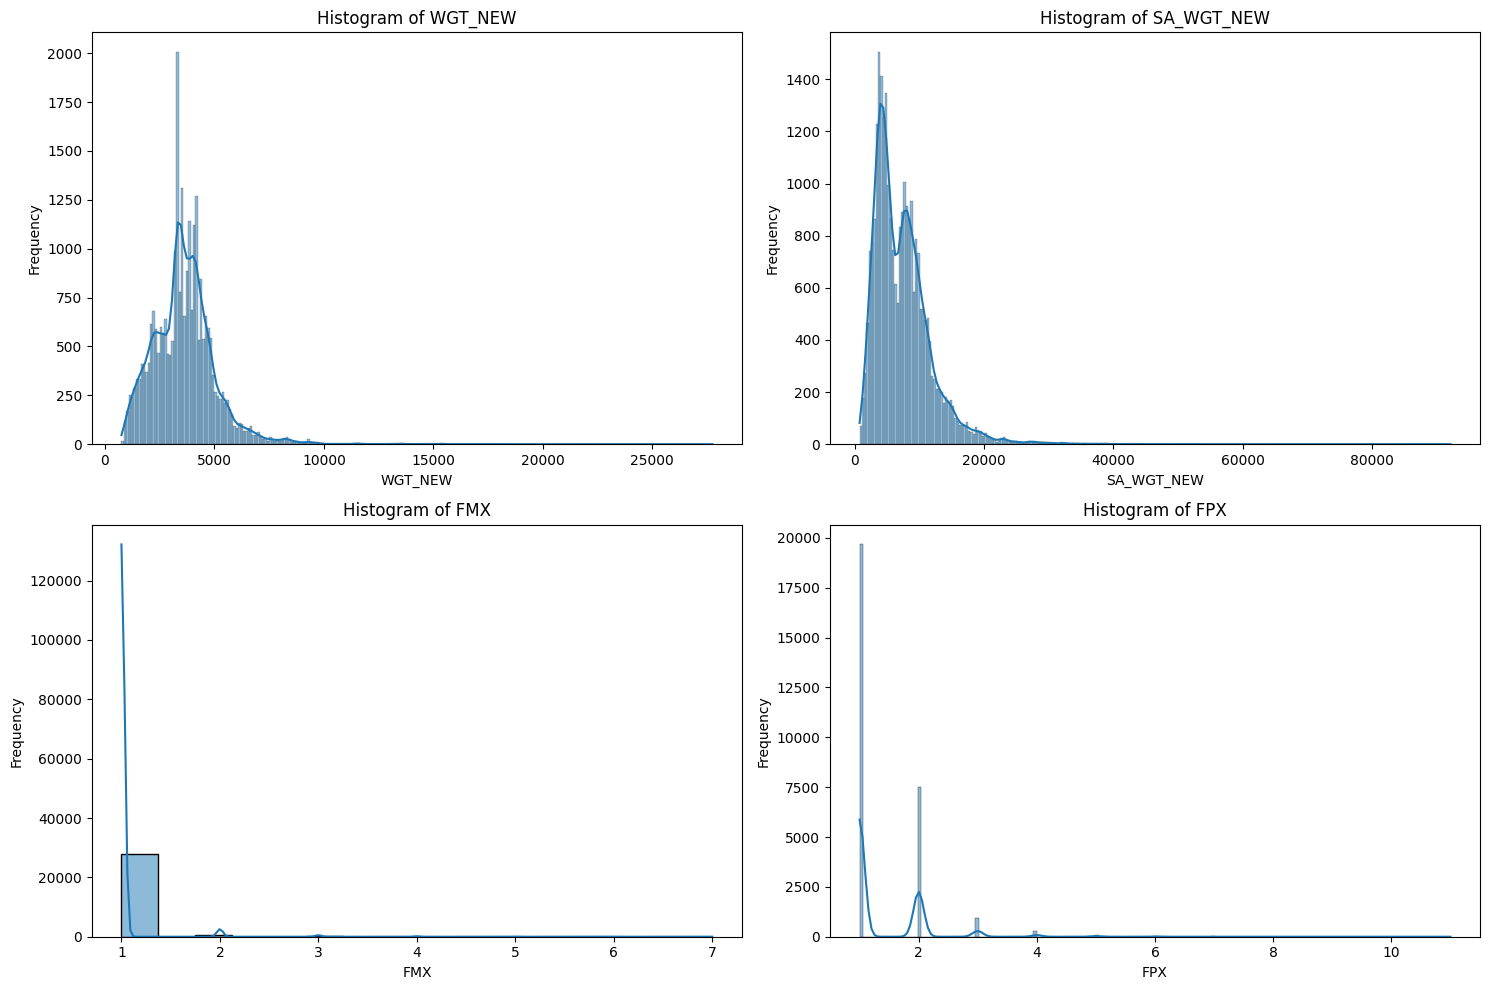

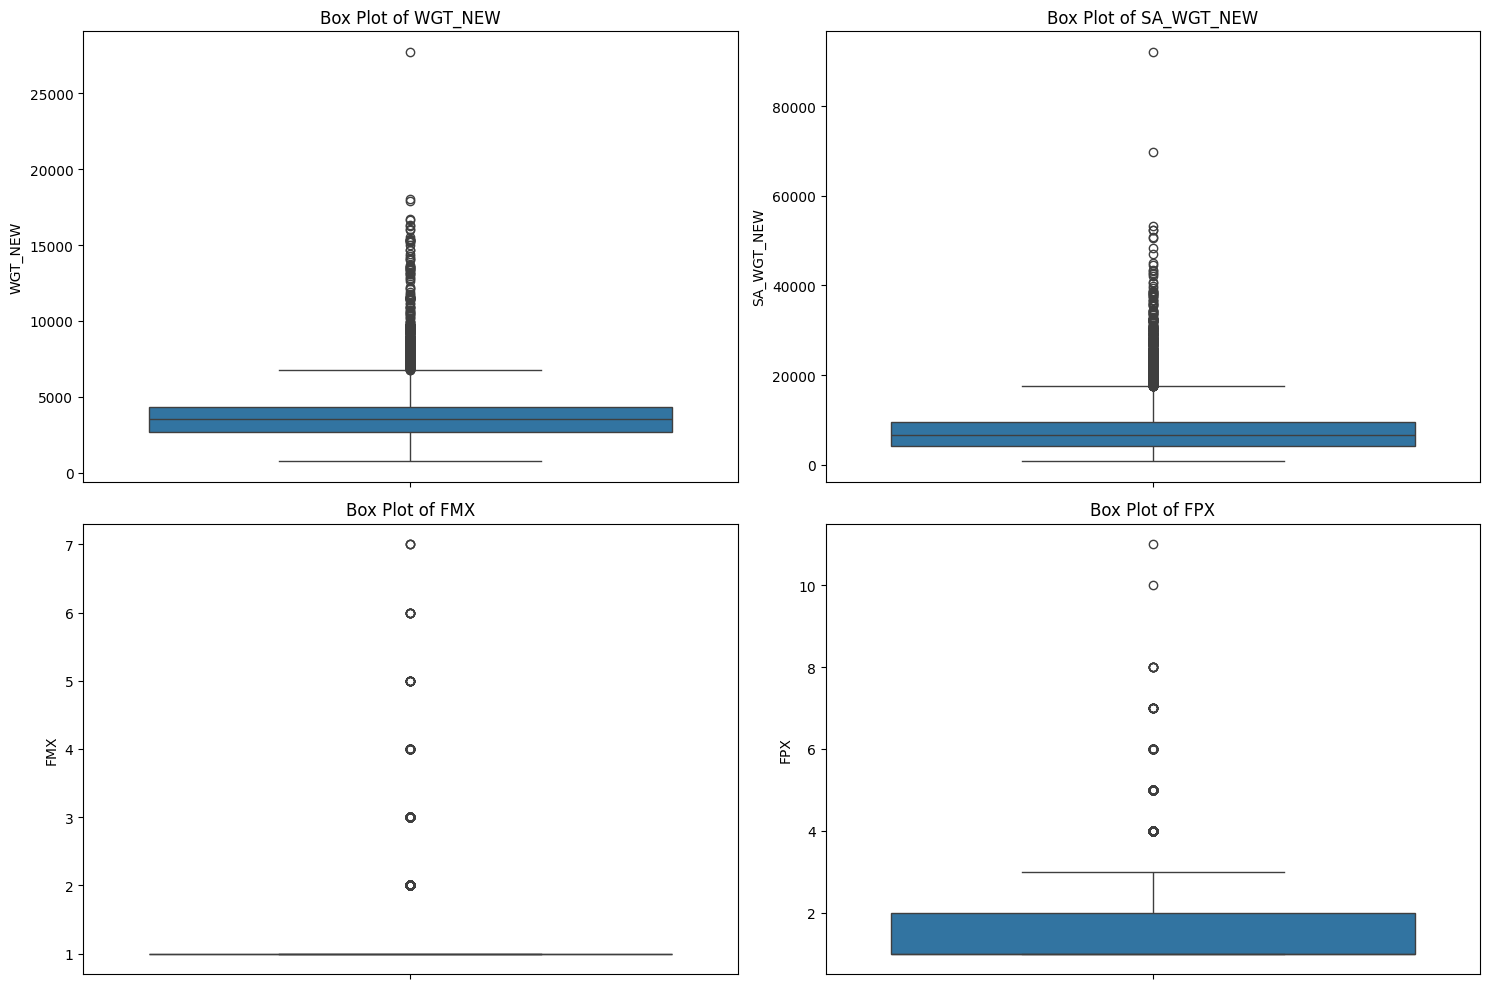

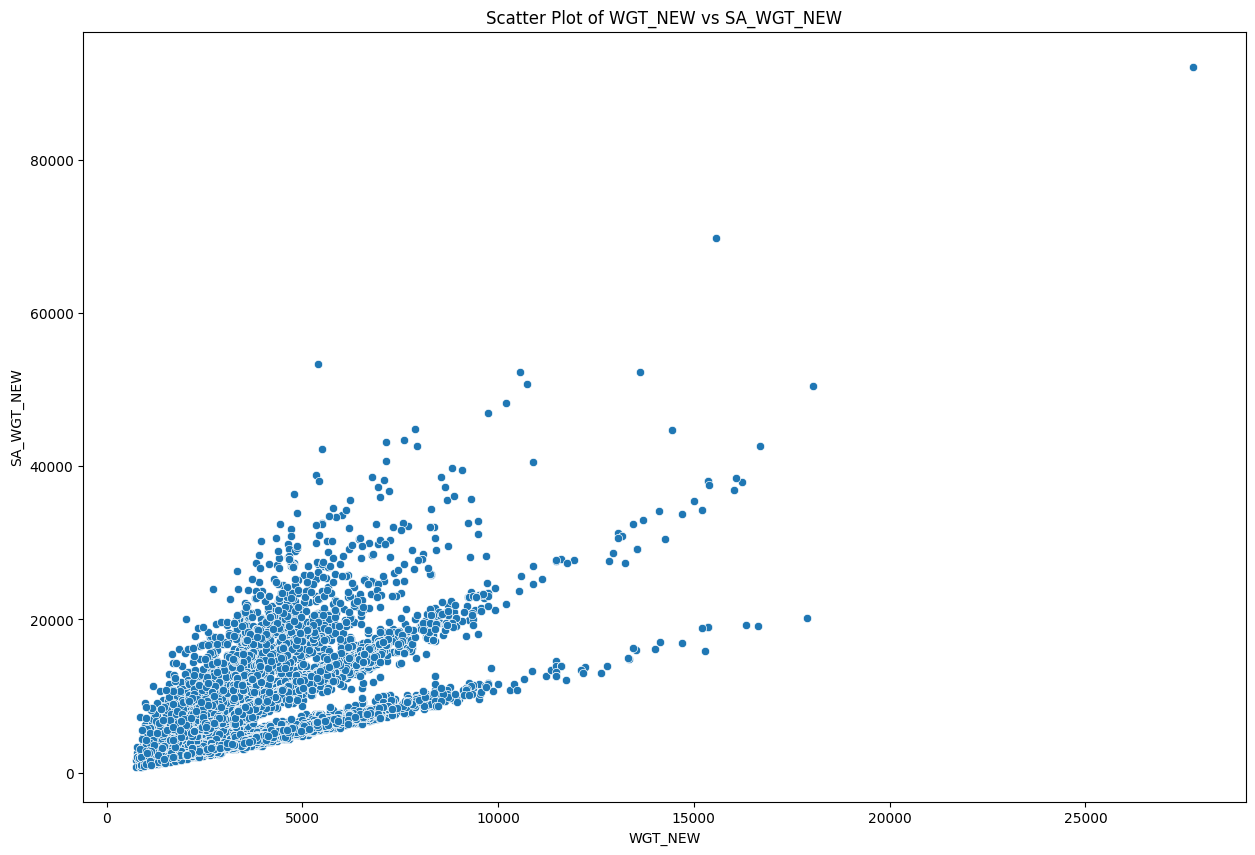

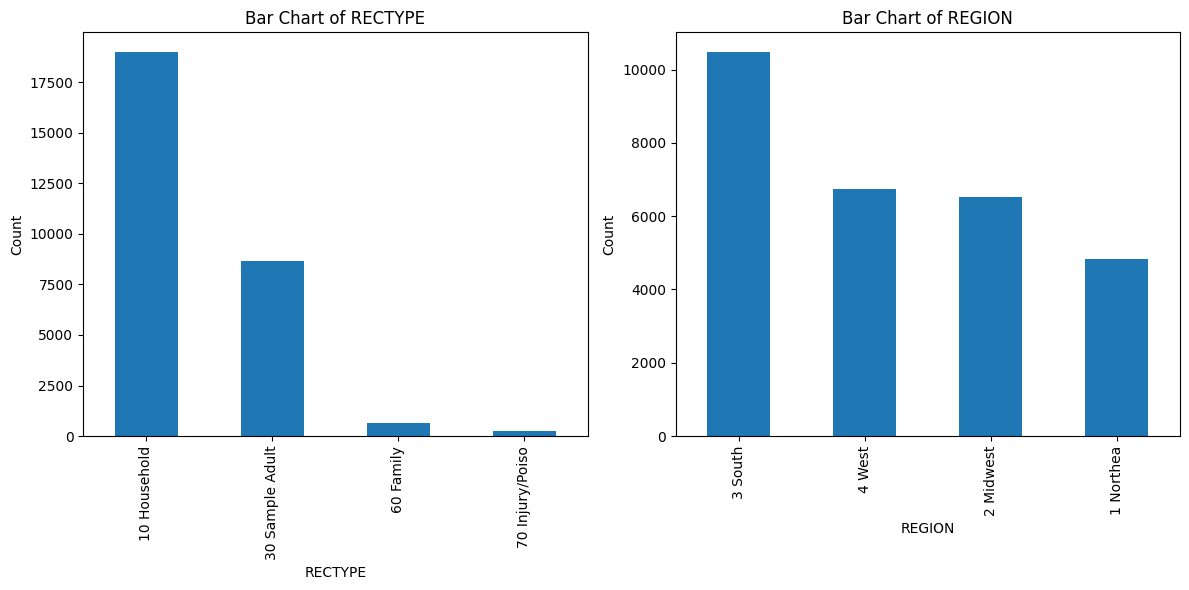

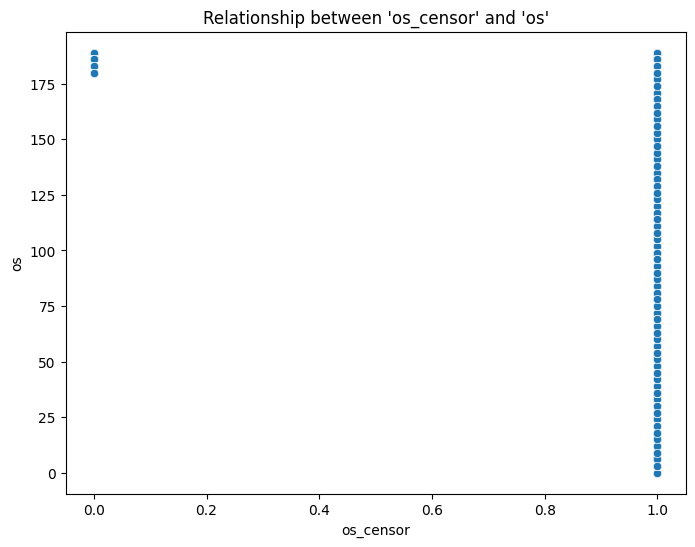

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features with potential outliers
numerical_features = ['WGT_NEW', 'SA_WGT_NEW', 'FMX', 'FPX']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Box plots for numerical features with potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Scatter plots for pairs of numerical features
plt.figure(figsize=(15, 10))
sns.scatterplot(x='WGT_NEW', y='SA_WGT_NEW', data=df)
plt.title('Scatter Plot of WGT_NEW vs SA_WGT_NEW')
plt.show()

# Bar charts for categorical features
categorical_features = ['RECTYPE', 'REGION']
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualize the relationship between 'os_censor' and 'os'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='os_censor', y='os', data=df)
plt.title("Relationship between 'os_censor' and 'os'")
plt.show()

## Summary:

### 1. Q&A

The provided data analysis process does not explicitly pose questions. However, the analysis implicitly seeks to answer questions about the dataset's characteristics, including:

* What is the shape and structure of the data?
* What are the data types of the columns?
* Are there missing values, and if so, how prevalent are they?
* What are the distributions of numerical and categorical variables?
* Are there any outliers in the numerical data?
* What are the relationships between different variables?


### 2. Data Analysis Key Findings

* **Data Dimensions:** The dataset comprises 28,598 rows and 490 columns.
* **Missing Data:** Several columns exhibit a high percentage of missing values, with some having 100% missing values (e.g., `HYRTEV`, `MOM_ED`, `DAD_ED`).  This indicates a need for data imputation or removal of these columns depending on the downstream task.
* **Potential Outliers:** Numerical columns like `WGT_NEW`, `SA_WGT_NEW`, `FMX`, and `FPX` show potential outliers, as evidenced by maximum values significantly exceeding the 75th percentile in their descriptive statistics.  Histograms and box plots were generated to visualize these potential outliers.
* **Data Types Mix:** The dataset contains a mix of numerical (float64 and int64) and categorical (object) data, requiring different analysis methods for each type.
* **Categorical Variable Distribution:** The `RECTYPE` and `REGION` columns were visualized using bar charts to understand the distribution of categories.
* **Correlation Analysis:** A correlation matrix was computed for the numerical features to reveal linear relationships between them. However, some columns with high missing value percentages like `HYRTEV` and `SRVY_YR` did not appear in the correlation analysis.


### 3. Insights or Next Steps

* **Address Missing Data:**  Develop a strategy for handling the substantial missing data. Options include imputation (mean, median, mode, or more sophisticated methods) or removal of columns/rows with excessive missing values, depending on the impact on the analysis.
* **Investigate Outliers:** Further investigate the potential outliers in the identified numerical columns.  Determine if they are genuine data points or errors.  Decide whether to remove, transform, or retain them based on their impact on the analysis and the downstream task.


In [14]:
cat_cols = df.select_dtypes(include='object').columns
print(f"Number of categorical columns: {len(cat_cols)}")


Number of categorical columns: 298


In [17]:
df['MORTSTAT'].unique()


array(['Assumed alive', 'Assumed deceased', 'Ineligible or under age 18'],
      dtype=object)

In [18]:
# Step 1: Remove rows where MORTSTAT is "Ineligible or under age 18"
df = df[df['MORTSTAT'] != 'Ineligible or under age 18'].copy()

# Step 2: Recode the remaining MORTSTAT values
df['mortality'] = df['MORTSTAT'].map({
    'Assumed alive': 0,
    'Assumed deceased': 1
})

# Step 3: Make sure it's an integer type
df['mortality'] = df['mortality'].astype(int)

# Optional: verify the result
print(df['mortality'].value_counts())


mortality
0    22263
1     4818
Name: count, dtype: int64


In [19]:
print("Data shape after filtering:", df.shape)


Data shape after filtering: (27081, 394)


In [21]:
# Step 1: One-hot encode
X = pd.get_dummies(df.drop(columns=['MORTSTAT', 'mortality']), drop_first=True)

# 🔄 Step 1.5: Impute missing values
X = X.fillna(X.mode().iloc[0])  # mode for each column (good for categorical)

# Step 2: Define target
y = df['mortality']

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split (optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Lasso with logistic regression
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
lasso.fit(X_train, y_train)

# Step 6: Extract selected features
import pandas as pd
coef = pd.Series(lasso.coef_[0], index=X.columns)
selected_features = coef[coef != 0].sort_values(key=abs, ascending=False)

print("Selected features by Lasso:")
print(selected_features)


Selected features by Lasso:
DODYEAR_Ineligible, under age 18, or assumed alive                                          -1.322136
DODQTR_Ineligible, under age 18, or assumed alive                                           -1.303159
UCOD_LEADING_Ineligible, under age 18, assumed alive, or no cause of death data available   -1.294005
os_censor                                                                                    1.118247
DIABETES_No - Condition not listed as a multiple cause of death                              0.620907
DIABETES_Yes - Condition listed as a multiple cause of death                                 0.013590
dtype: float64


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: One-hot encode all categorical variables (drop_first to reduce multicollinearity)
X = pd.get_dummies(df.drop(columns=['MORTSTAT', 'mortality']), drop_first=True)

# Step 2: Handle missing values (use mode or simple imputation)
X = X.fillna(X.mode().iloc[0])

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 5: Output
print(f"Original shape: {X.shape}")
print(f"Reduced shape after PCA: {X_pca.shape}")


Original shape: (27081, 1850)
Reduced shape after PCA: (27081, 1099)


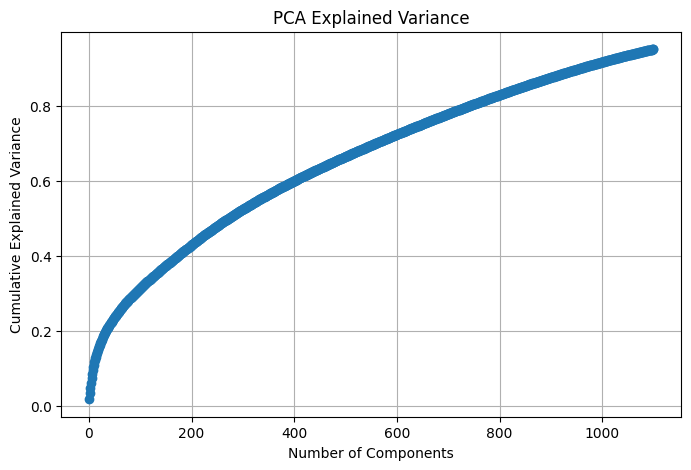

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


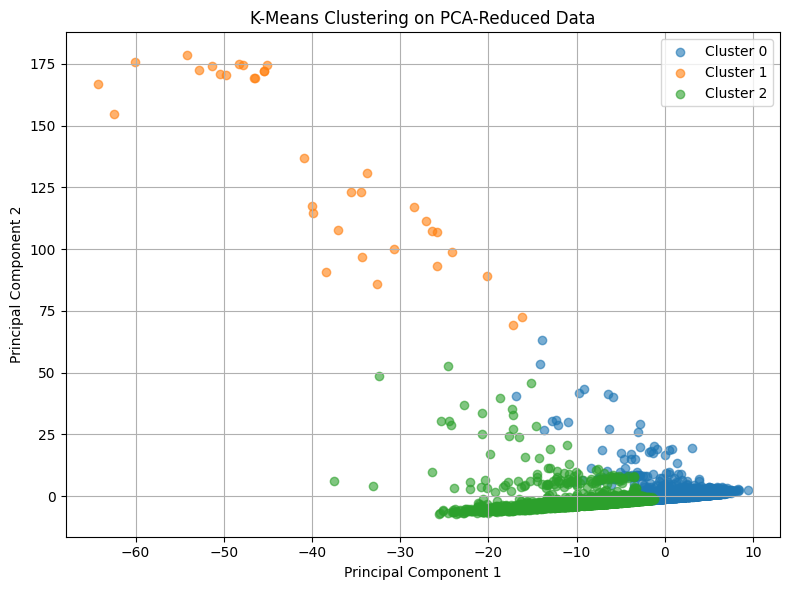

Silhouette Score for k=3: 0.062


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: K-means clustering (you can try different values for k)
k = 3  # You can adjust this depending on your research question
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to your PCA-transformed data
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df['cluster'] = clusters

# Step 2: Visualize the clusters using first 2 principal components
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(X_pca_df[X_pca_df['cluster'] == cluster_id]['PC1'],
                X_pca_df[X_pca_df['cluster'] == cluster_id]['PC2'],
                label=f'Cluster {cluster_id}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Evaluate clustering (optional but useful)
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for k={k}: {sil_score:.3f}')


In [26]:
# View all column names, one per line
for col in df.columns:
    print(col)


ELIGSTAT
MORTSTAT
UCOD_LEADING
DIABETES
HYPERTEN
DODQTR
DODYEAR
WGT_NEW
SA_WGT_NEW
RECTYPE
SRVY_YR
HHX
FMX
FPX
WTIA
WTFA
STRATUM
PSU
SEX
ORIGIN_I
ORIGIMPT
HISPIMPT
HISPAN_I
RACERPI2
RACEIMP2
MRACRPI2
MRACBPI2
RACRECI2
HISCODI2
ERIMPFLG
NOWAF
RRP
HHREFLG
DOB_M
DOB_Y_P
AGE_P
FRRP
FMRPFLG
FMREFLG
R_MARITL
CDCMSTAT
FMOTHER
MOM_DEG
FFATHER
DAD_DEG
PARENTS
ASTATFLG
PLAADL
PLAIADL
PLAWKNOW
PLAWKLIM
PLAWALK
PLAREMEM
PLIMANY
LA1AR
LACHRONR
PHSTAT
PDMED12M
PNMED12M
PHOSPYR
PHCHM2W
PHCPH2WR
PHCDV2W
PHCDVN2W
P10DVYR
NOTCOV
MEDICARE
MEDICAID
SINGLE
PRIVATE
SCHIP
OTHERPUB
OTHERGOV
MILITARY
IHS
HINOTYR
HCSPFYR
HIKINDA
HIKINDB
HIKINDC
HIKINDD
HIKINDE
HIKINDF
HIKINDG
HIKINDH
HIKINDI
HIKINDJ
HIKINDK
MCAREPRB
MCAIDPRB
SINCOV
PLBORN
REGIONBR
GEOBRTH
YRSINUS
CITIZENP
EDUC1
PMILTRY
DOINGLWP
WHYNOWKP
WRKHRS2
WRKFTALL
WRKLYR1
WRKMYR
ERNYR_P
HIEMPOF
PSAL
PSEINC
PSSRR
PPENS
POPENS
PSSI
PTANF
POWBEN
PINTRSTR
PDIVD
PCHLDSP
PINCOT
PSSAPL
PSDAPL
PFSTP
ELIGPWIC
PWIC
hhxid
OCCUP1A
OCCUP2A
OCCUPN1
OCCUPN2
WRKCATA
BUSI

In [25]:
# Step 1: Add mortality and NCD to the PCA DataFrame for analysis
X_pca_df['mortality'] = df['mortality'].values  # Add mortality column
X_pca_df['NCD'] = df['NCD'].values  # Assuming NCD status is already in the dataframe as 0 or 1

# Step 2: Calculate the percentage of mortality (mortality = 1) in each cluster
mortality_composition = X_pca_df.groupby('cluster')['mortality'].value_counts(normalize=True).unstack().fillna(0)
mortality_composition['mortality_percentage'] = mortality_composition[1] * 100

# Step 3: Calculate the percentage of NCD status in each cluster
ncd_composition = X_pca_df.groupby('cluster')['NCD'].value_counts(normalize=True).unstack().fillna(0)
ncd_composition['NCD_percentage'] = ncd_composition[1] * 100

print("Mortality composition in each cluster:")
print(mortality_composition[['mortality_percentage']])

print("\nNCD composition in each cluster:")
print(ncd_composition[['NCD_percentage']])


KeyError: 'NCD'